# Create all charts
---

## The data sets we used are:
* City of San Diego 311 service requests
* The San Diego zip codes from the US Census Bureau
* Economic census data for San Diego by zipcode from the US Census Bureau
* Open Weather Map History for temperature information

In [1]:
import os
import datetime
import numpy as np
import regex as reg
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
path_311 = os.path.join('..', 'data', '311_cleaned_data_.csv')
df = pd.read_csv(path_311)
df.dropna(inplace=True)
df.count()

service_request_id      29578
status_description      29578
mobile_web_status       29578
duplicate_verified      29578
override_duplicate      29578
functional_location     29578
source                  29578
closed_date             29578
updated_datetime        29578
open                    29578
closed                  29578
description             29578
agency_responsible      29578
service_name            29578
service_subtype         29578
lat                     29578
long                    29578
sap_problem_category    29578
sap_problem_type        29578
address                 29578
case_record_type        29578
district                29578
date                    29578
time                    29578
weekday                 29578
year                    29578
month                   29578
day                     29578
dtype: int64

### Number of 311 calls by month

* calls from 2017-03-11 to 2018-03-10

In [3]:
period_311 = df[df['date'] > '2017-03-10']
period_311 = period_311[period_311['date'] < '2018-03-11']
months = period_311.groupby('month', as_index=False)['service_request_id'].count()
months['month'] = months['month'].map(lambda x: datetime.date(1900, int(x), 1).strftime('%B'))

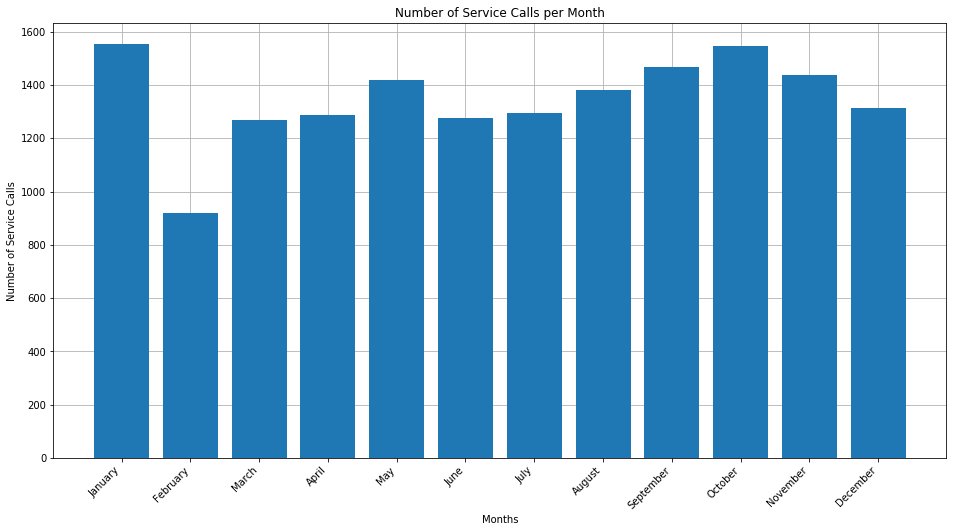

In [6]:
plt.figure(figsize=[16, 8])
plt.bar(months['month'], months['service_request_id'],zorder=2)
plt.title('Number of Service Calls per Month')
plt.xlabel('Months')
plt.ylabel('Number of Service Calls')
plt.xticks(rotation=45, ha='right')
plt.grid()

## Number of 311 Call by Zip Code

In [12]:
final_311_path = os.path.join('..','data','final_311.csv')
final_311_df = pd.read_csv(final_311_path)
final_311_df.head()

,zip_code,Mean income,MoE Mean income,Median income,MoE Median income,total population,service_request_id,status_description,mobile_web_status,duplicate_verified,...,sap_problem_type,address,case_record_type,district,date,time,weekday,year,month,day
0,91911,62932,2137,51383,1874,84241,"384,120.00",New,New,0.00,...,NaN,"468 Marsh Harbor Dr, San Diego, CA 92154, USA",Parking,8.00,2018-07-29,12:01:00,Sunday,"2,018.00",7.00,29.00
1,91911,62932,2137,51383,1874,84241,"371,242.00",Assigned,In Process,0.00,...,NaN,"3661 Palm Ave, San Diego, CA 92154, USA",Street Division,8.00,2018-07-28,21:16:00,Saturday,"2,018.00",7.00,28.00
2,91911,62932,2137,51383,1874,84241,"370,923.00",Acknowledged,In Process,0.00,...,NaN,5192 TOPSIDE LANE,Street Division,8.00,2018-07-27,09:35:00,Friday,"2,018.00",7.00,27.00
3,91911,62932,2137,51383,1874,84241,"370,790.00",Duplicate,In Process,0.00,...,NaN,"2758 AGNO CT, 92154",Storm Water Code Enforcement,8.00,2018-07-26,12:05:00,Thursday,"2,018.00",7.00,26.00
4,91911,62932,2137,51383,1874,84241,"370,789.00",Duplicate,In Process,0.00,...,NaN,"2758 AGNO CT, 92154",Storm Water Code Enforcement,8.00,2018-07-26,12:05:00,Thursday,"2,018.00",7.00,26.00


In [68]:
zip_service = final_311_df.groupby('zip_code')['service_request_id'].count().sort_values(ascending=False)
# zip_service

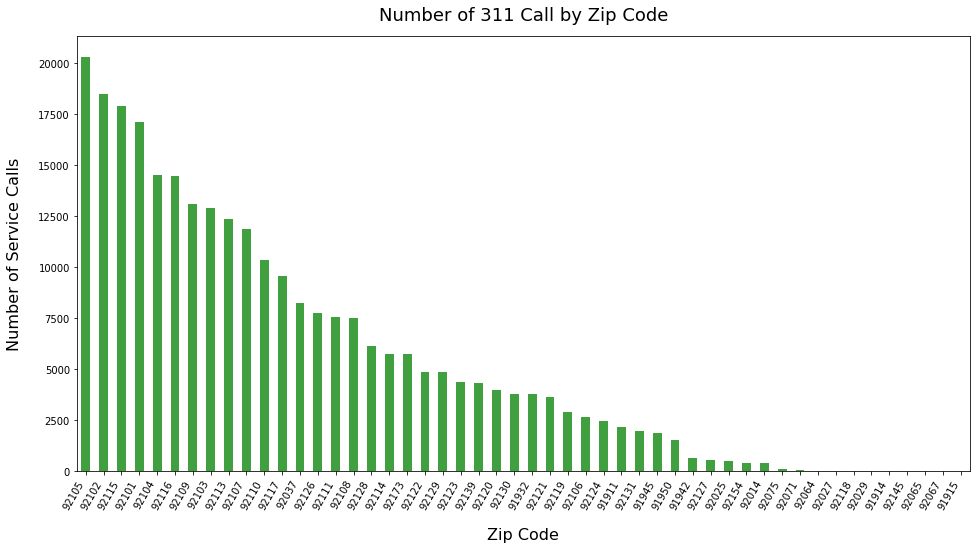

In [70]:
fig, ax = plt.subplots(figsize=[16, 8])
zip_service_plt = zip_service.plot(kind='bar', color='green',alpha =0.75)
plt.xlabel('Zip Code',fontsize=16,labelpad=16)
plt.ylabel('Number of Service Calls',fontsize=16,labelpad=16)
plt.title('Number of 311 Call by Zip Code',fontsize=18,pad=16)
plt.xticks(rotation=60, ha='right')
plt.savefig(os.path.join('..','figures','number_of_311_call_by_zip_code.png'))

### Number of 311 calls by type

* Garrett is working on this

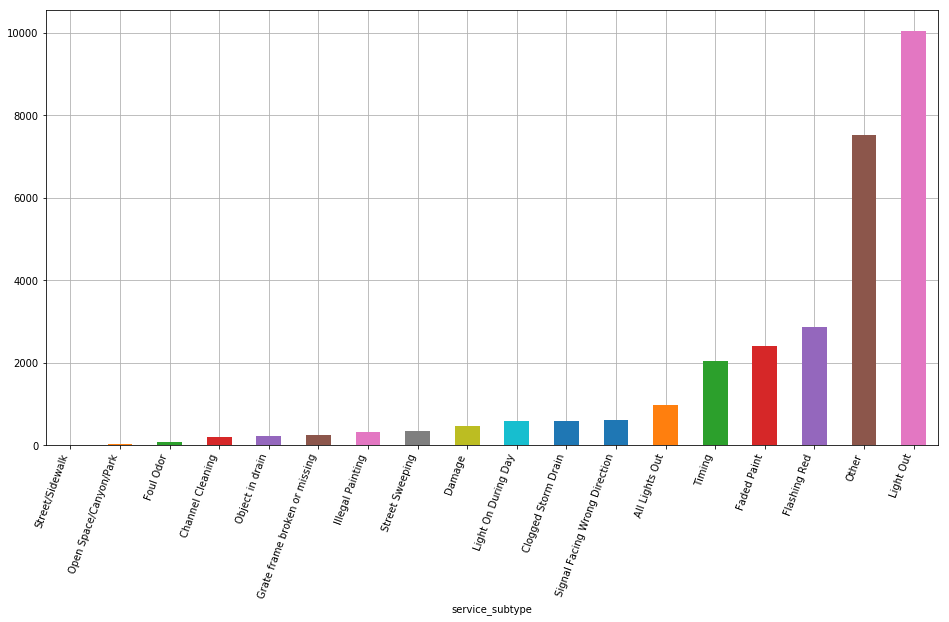

In [9]:
service = df.groupby('service_subtype')['service_request_id'].count().sort_values().tail(20)
fig, ax = plt.subplots(figsize=[16, 8])
service.plot.bar(zorder=2)
plt.xticks(rotation=70, ha='right')
plt.grid()

### breakdown of percentage of call categories

### locations of callers (bubble plot?)

### Number of calls per capita by zipcode

In [9]:
pop_path = os.path.join('..', 'data', 'census_population_by_zip.csv')
pop_df = pd.read_csv(pop_path)
pop_df.head()

,zip_code,total population
0,91901,18586
1,91902,19429
2,91905,1539
3,91906,3565
4,91910,76027


### Number of calls by median household income of zip

In [10]:
income_path = os.path.join('..', 'data', 'census_income_by_zip.csv')
income_df = pd.read_csv(income_path)
income_df.head()

,zip_code,Mean income,MoE Mean income,Median income,MoE Median income
0,91911,62932,2137,51383,1874
1,91914,137640,8680,124578,7047
2,91915,111918,8589,104170,6753
3,91932,59870,2942,48010,1975
4,91942,70677,3837,55753,3194


### Number of calls by crime rate of zip

### Percent of call types by median household income (stacked bar)

### Number of calls by Temperature scatter

* calls from 2017-03-11 to 2018-03-10

In [47]:
owm_path = os.path.join('..', 'data', 'owm_2016_2018.csv')
temp_df = pd.read_csv(owm_path)
temp_df['date'] = temp_df['dt_iso'].map(lambda x: reg.sub('\s\d{2}:\d{2}:\d{2}\s\+\d{4}\sUTC', '', x))
temp_df = temp_df[temp_df['date'] > '2017-03-10']
temp_df = temp_df[temp_df['date'] < '2018-03-11']
temp_df = temp_df.groupby('date', as_index=False).mean()

In [46]:
date_311 = period_311.groupby('date', as_index=False).count()

Text(0,0.5,'Temperature in Fahrenheit')

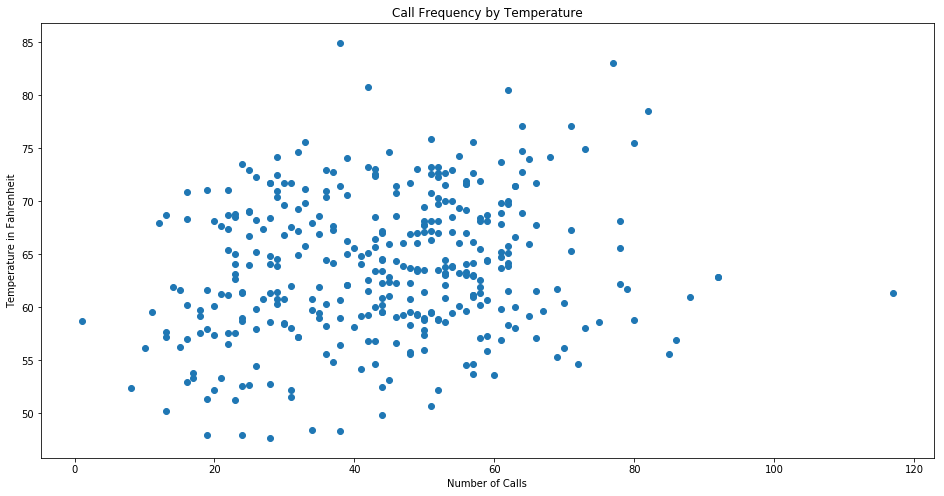

In [50]:
plt.figure(figsize=[16, 8])
plt.scatter(date_311['service_request_id'], temp_df['temp_f'])
plt.title('Call Frequency by Temperature')
plt.xlabel('Number of Calls')
plt.ylabel('Temperature in Fahrenheit')

### Number fo calls by weekday

In [44]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', ]
weekdays = df.groupby('weekday', as_index=False)['service_request_id'].count()
weekdays['day_order'] = weekdays['weekday'].map(lambda x: days.index(x))
weekdays.sort_values('day_order', inplace=True)
weekdays

,weekday,service_request_id,day_order
1,Monday,4871,0
5,Tuesday,5140,1
6,Wednesday,5070,2
4,Thursday,4801,3
0,Friday,4631,4
2,Saturday,2688,5
3,Sunday,2377,6


Text(0,0.5,'Number of Calls')

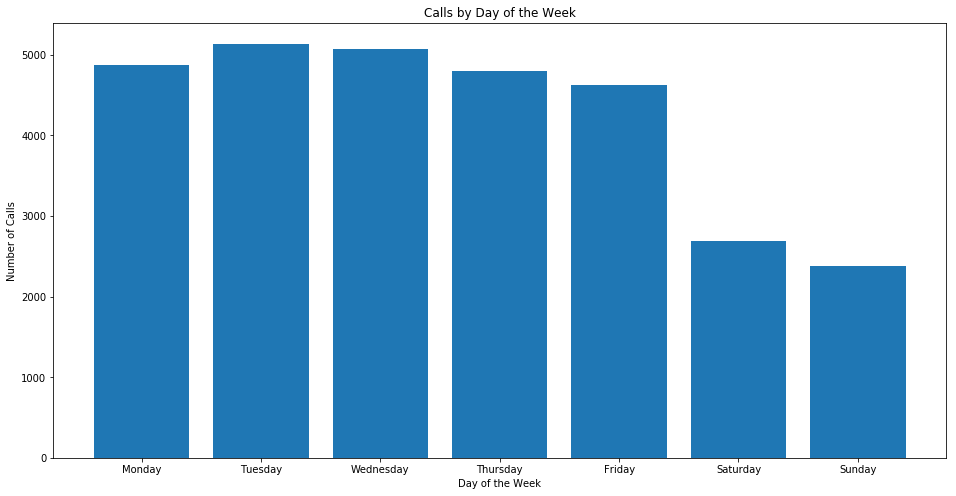

In [51]:
plt.figure(figsize=[16, 8])
plt.bar(weekdays['weekday'], weekdays['service_request_id'])
plt.title('Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')